# studying LMC & SMC

In [4]:
%matplotlib inline
# common functions used in the project of VR-R in GAC direction
import numpy as np
#import scipy.linalg as splin
import numpy.linalg as nl
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)
font = {'size' : 20}
matplotlib.rc('font', **font)
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.special as special
import astropy.io.fits as fits
import math as m
import emcee
import corner
import pandas as pd
import csv
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
import sys
sys.path.append('/Users/htian/Documents/GitHub/astroth/')
import CoordinateConversion as CC
import galpy.util.bovy_coords as gub
import sfdmap
import os

In [17]:
path = os.getcwd()
ppath = path+"/plots/"
fn_data = "GDR2_Mgiant_candidate_color2_b20_gmag10_20_rest_4000_EBV.fits"
#  dust map of schlegel
dmap=sfdmap.SFDMap('/Users/htian/Documents/GitHub/sfddata-master',scaling=1.0)   

In [50]:
dt = fits.open(path+"/"+fn_data)
data = dt[1].data
raGa,decGa = np.array(data["ra"]),np.array(data["dec"])
pmraGa,pmdecGa = np.array(data["pmra"]),np.array(data["pmdec"])
pmraGea,pmdecGea = np.array(data["pmra_error"]),np.array(data["pmdec_error"])
MagGa = np.array(data["phot_g_mean_mag"])
BPRPGa = np.array(data["bp_rp"])
lGa,bGa = np.array(data["l"]),np.array(data["b"])
S_IDa = data["source_id_1"]
AENa = data["astrometric_excess_noise"]
BEFa = data["phot_bp_rp_excess_factor"] 
EBVa = data["EBV"]
rvGa,rveGa = data["radial_velocity"],data["radial_velocity_error"]
ind = (AENa<0.25) & (BEFa<1.5) & (EBVa<0.8)
raG,decG = raGa[ind],decGa[ind]
pmraG,pmdecG = pmraGa[ind],pmdecGa[ind]
pmraGe,pmdecGe = pmraGea[ind], pmdecGea[ind]
MagG,BPRPG = MagGa[ind],BPRPGa[ind]
lG,bG = lGa[ind],bGa[ind]
S_ID = S_IDa[ind]
AEN = AENa[ind]
BEF = BEFa[ind]
EBV = EBVa[ind]
rv,rve = rvGa[ind],rveGa[ind]

In [51]:
ebv = dmap.ebv(raG,decG)   # ebv 
AmG = 2.35 * ebv           # extinction correction
# dynamical center
DC_LMC = [78.77, -69.01]    # coordinates of the LMC (ra, dec)  from AMINA_GC 1804.09381
DC_SMC = [16.26, -72.42]    # coordinates of the LMC (ra, dec)  from AMINA_GC 1804.09381
# photometric center
PC_LMC = [81.28, -69.78]    # coordinates of the LMC (ra, dec)  from AMINA_GC 1804.09381
PC_SMC = [12.80,-73.15]    # coordinates of the LMC (ra, dec)  from AMINA_GC 1804.09381


pmra_LMC, pmdec_LMC = 1.850,0.234     # PM of LMC  from AMINA_GC 1804.09381, errors are 0.030 0.030
pmra_SMC, pmdec_SMC = 0.797,-1.220    # PM of SMC  from AMINA_GC 1804.09381, errors are 0.030 0.030


D2LMC = np.sqrt((raG-C_LMC[0])**2*np.cos(C_LMC[1]*m.pi/180)**2 + (decG-C_LMC[1])**2)
D2SMC = np.sqrt((raG-C_SMC[0])**2*np.cos(C_SMC[1]*m.pi/180)**2 + (decG-C_SMC[1])**2)
R_LMC, R_SMC = 10,5

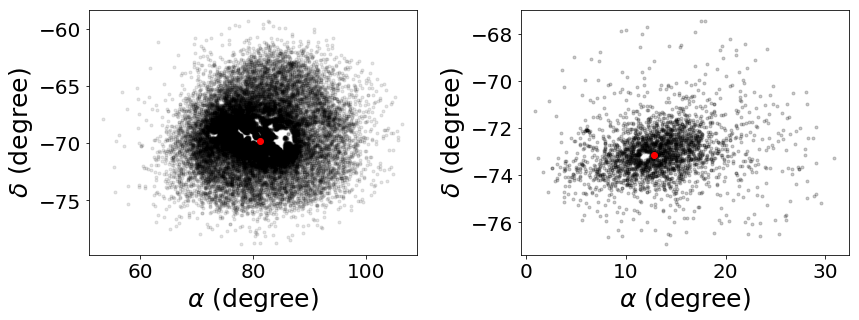

(11, 19)

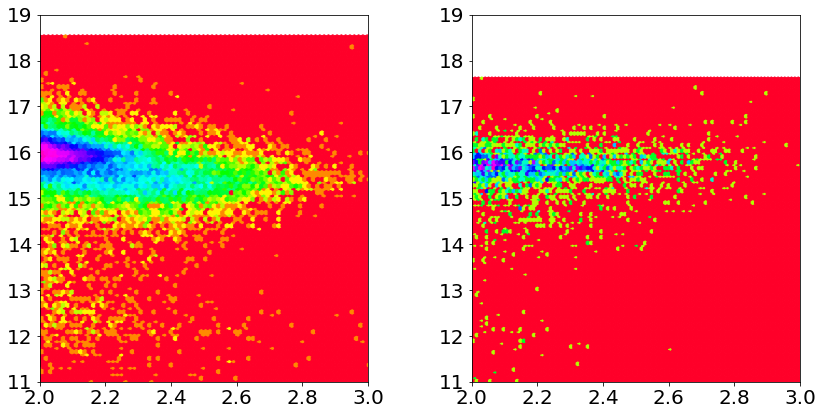

In [70]:
ind_LMC = D2LMC<R_LMC
ind_SMC = D2SMC<R_SMC

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.1,0.2,0.38,0.85])
ax2 = fig.add_axes([0.6,0.2,0.38,0.85])
ax1.plot(raG[ind_LMC],decG[ind_LMC],'k.',alpha=0.1)
ax1.plot(PC_LMC[0],PC_LMC[1],'ro')
ax1.set_xlabel("$\\alpha$ (degree)",fontsize=25)
ax1.set_ylabel("$\\delta$ (degree)",fontsize=25)

ax2.plot(raG[ind_SMC],decG[ind_SMC],'k.',alpha=0.2)
ax2.plot(PC_SMC[0],PC_SMC[1],'ro')
ax2.set_xlabel("$\\alpha$ (degree)",fontsize=25)
ax2.set_ylabel("$\\delta$ (degree)",fontsize=25)
plt.show()

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_axes([0.1,0.2,0.38,0.85])
ax2 = fig.add_axes([0.6,0.2,0.38,0.85])
ax1.hexbin(BPRPG[ind_LMC],MagG[ind_LMC],bins="log",cmap="gist_rainbow")
ax1.set_xlim([2.0,3])
ax1.set_ylim([11,19])
ax2.hexbin(BPRPG[ind_SMC],MagG[ind_SMC],bins="log",cmap="gist_rainbow")
ax2.set_xlim([2.0,3])
ax2.set_ylim([11,19])

[2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


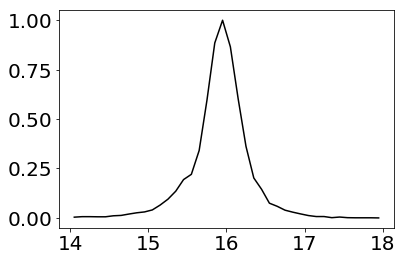

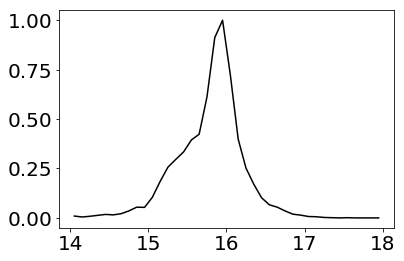

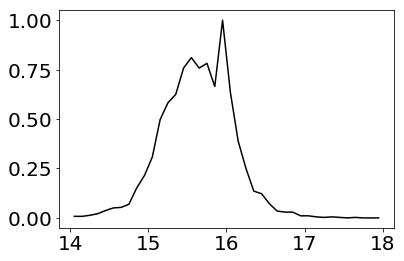

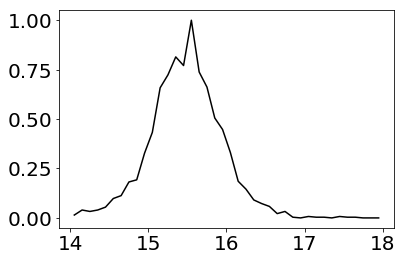

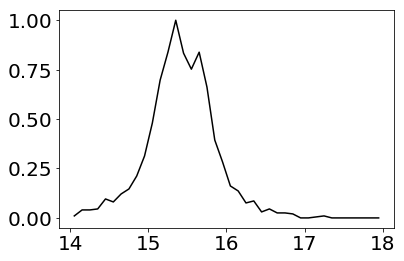

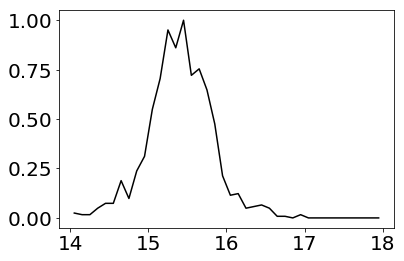

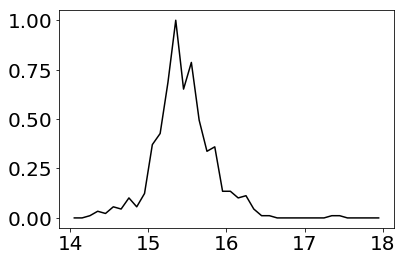

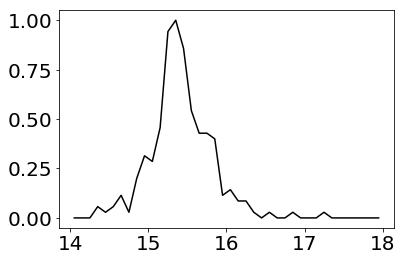

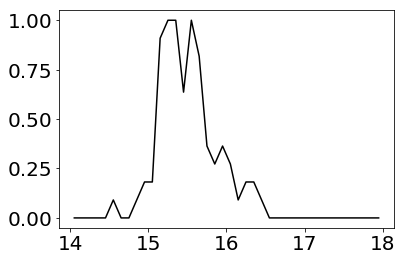

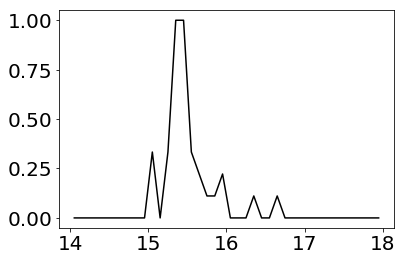

In [81]:
bins_BPRP = np.linspace(2,3,11)
bins_MAGG = np.linspace(14,18,41)
half_BPRP = (bins_BPRP[1]-bins_BPRP[0]) * 0.5
half_MAGG = (bins_MAGG[1]-bins_MAGG[0]) * 0.5
print(bins_BPRP)
for i in range(0,10):
    indC = (BPRPG[ind_LMC]>bins_BPRP[i]) & (BPRPG[ind_LMC]<=bins_BPRP[i+1])
    hy,hx = np.histogram(MagG[ind_LMC][indC],bins = bins_MAGG)
    plt.plot(hx[:-1]+half_MAGG,hy/np.max(hy),'k-')
    plt.show()